In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji
import jaconv
import collections
import MeCab

In [2]:
cd ../

C:\Users\akite\OneDrive\デスクトップ\source code\twitter-compe


In [3]:
df = pd.read_csv('./arranged_data/wakati.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,flg,keyword,location,text,is_url,is_location,num_emoji,num_reply,num_hash,text_length,text_wakati,num_kusa
0,0,0,0,20587,0,覚醒剤,icon:大トロ( ),【ﾏｲﾘｽﾄ】ｶｶｶｶ覚醒剤 #sm36302050,True,False,0.0,0,1,50.0,"['【', 'ﾏｲﾘｽﾄ', '】', 'ｶｶｶｶ', '覚醒剤', ' ', '#', ...",0
1,1,1,1,31857,0,雷 落雷,ジャングル,せやな 落雷撃たれたら全員張り付くしかなかったからなぁ なんで速攻で雷銅狙いに行ったわ,False,False,0.0,1,0,59.0,"['する', 'や', 'な', ' ', '落雷', '撃つ', 'れる', 'た', '...",0
2,2,2,2,36793,0,血液,↓↓↓↓↓こちらをクリック↓↓↓↓,【ｶﾌｪｲﾝの力】 体を動かす前にｶﾌｪｲﾝを摂ると交感神経が刺激され､体内の脂肪が分解され...,False,False,0.0,0,0,139.0,"['【', 'ｶﾌｪｲﾝ', 'の', '力', '】', ' ', '体', 'を', '...",0
3,3,3,3,42299,0,ハリケーン,Close to your heart,あなたの鼓膜に直に響かせたい ﾊﾘｹｰﾝのように激しく愛したい 余計な壁なんて取っ払って 奥...,False,False,0.0,0,0,119.0,"['あなた', 'の', '鼓膜', 'に', '直に', '響かせる', 'たい', ' ...",0
4,4,4,4,51449,0,殺人鬼,偽物なので悪しからず,違う違う｡お化けは現実にいないけど殺人鬼は現実にいるじゃん〜｡うｰん､ﾎﾗｰってなると難し...,False,False,0.0,1,0,146.0,"['違う', '違う', '｡', 'お化け', 'は', '現実', 'に', 'いる',...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20280,20280,20280,20280,45367,0,爆発した,NaN,まだ爆発したかはわかりません｡ 一つだけ言えることは､もうすぐ(数万年以内に)爆発するとい...,False,True,0.0,1,0,101.0,"['まだ', '爆発', 'する', 'た', 'か', 'は', 'わかる', 'ます',...",0
20281,20281,20281,20281,45546,0,爆発した,🐒🐟 ✩͓̊ 🌊🐷,ぴこち愛爆発した ｡ ぴこちぴこちぴこちいいいいいい 愛してる❤︎,False,False,1.0,1,0,42.0,"['ぴこち', '愛', '爆発', 'する', 'た', ' ', '｡', ' ', '...",0
20282,20282,20282,20282,31532,0,爆発,Japan,今のﾛｰﾃ環境､重要度で言うと 序盤からﾃﾝﾎﾟを取る動き<進化t以降に爆発的な動き だって...,False,False,0.0,0,0,138.0,"['今', 'の', 'ﾛｰﾃ', '環境', '､', '重要', '度', 'で', '...",0
20283,20283,20283,20283,21619,0,緊急 緊急事態,NaN,代議士先生 これは一般国民の意見が耳障りだから と言う理由での恫喝ですよね? 緊急事態...,False,True,0.0,1,0,102.0,"['代議士', '先生', ' ', 'これ', 'は', '一般', '国民', 'の'...",0


Counter({'a': 2, 'b': 1})


In [38]:
import collections

all_text = []

for wakati in df["text_wakati"].values:
    all_text.extend(wakati)

c = collections.Counter(all_text)
values, counts = zip(*c.most_common(50))
values

("'",
 ' ',
 ',',
 'る',
 'の',
 'す',
 'い',
 'て',
 'た',
 'に',
 'で',
 'な',
 '､',
 ']',
 '[',
 'と',
 'が',
 'か',
 'ﾞ',
 'だ',
 'う',
 'は',
 '｡',
 'を',
 'ｰ',
 'も',
 'れ',
 'ま',
 'ん',
 'く',
 'ら',
 'し',
 'ﾝ',
 '!',
 'こ',
 'ｽ',
 'ﾄ',
 '人',
 'あ',
 'ｲ',
 'け',
 'り',
 'よ',
 'っ',
 '…',
 '0',
 'ど',
 'そ',
 '(',
 'ｸ')

c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12364 miss

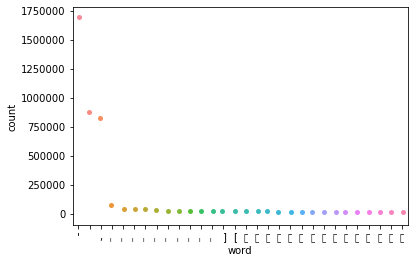

In [32]:
plot_df = pd.DataFrame()
plot_df["word"] = values
plot_df["count"] = counts
sns.stripplot(x="word",y="count",data = plot_df)